In [391]:
import math
import sympy as sym
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics

In [392]:
# a = [[1,2,3], [4,5,6]]
# a = np.asarray(a)
# 2*a

In [393]:
x,y,p = sym.symbols('x,y,p')
w=np.asarray([x,y])

In [394]:
# Domain

def pick():
    x = random.random()
    y = random.random()
    while x+y>=1 or x<=0 or y<=0:
        x = random.random()
        y = random.random()
    return x,y
# x,y  = pick()
# w = np.asarray([x,y])


In [395]:
# w[0]

In [396]:
log = math.log
f  = lambda p: -log(1-p[0]-p[1]) - log(p[0]) - log(p[1])

f2  = lambda p: -log(1-p[:,0]-p[:,1]) - log(p[:,0]) - log(p[:,1])

In [397]:
def der_x(w):
    return (1/(1-w[0]-w[1]) - (1/w[0]))

def der_y(w):
    return (1/(1-w[0]-w[1]) - (1/w[1]))

def der_x2(w):
    return ((1/(1-w[0]-w[1])**2) + (1/(w[0]**2)))

def der_y2(w):
    return ((1/(1-w[0]-w[1])**2) + (1/w[1]**2))

def der_xy(w):
    return (1/(1-w[0]-w[1])**2)

der_y2(w)

(-x - y + 1)**(-2) + y**(-2)

In [398]:
# Gradient
def g(w):
    return np.asarray([der_x(w), der_y(w)])
g(w)

array([1/(-x - y + 1) - 1/x, 1/(-x - y + 1) - 1/y], dtype=object)

In [399]:
# Hessian
def h(w):
    return (1/2.302)*np.asarray([[der_x2(w), der_xy(w)], [der_xy(w), der_y2(w)]])
h(w)

array([[0.434404865334492/(-x - y + 1)**2 + 0.434404865334492/x**2,
        0.434404865334492/(-x - y + 1)**2],
       [0.434404865334492/(-x - y + 1)**2,
        0.434404865334492/(-x - y + 1)**2 + 0.434404865334492/y**2]],
      dtype=object)

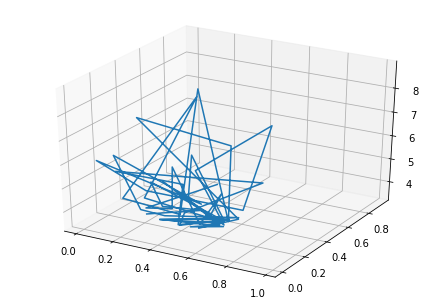

In [400]:
from mpl_toolkits.mplot3d import Axes3D

b =[]
d =[]
nu = []


for i in range(1,51):
    x,y = pick()
    b.append(x)
    d.append(y)
    w = np.asarray([x,y])
    nu.append(f(w))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(b, d, nu)
plt.show()

# Q) 1) b)

In [447]:
def gd(w, f, lr, prec, g, prec_E):
    x = w[0]
    y = w[1]
    w_i = w
    print("x = " + str(x))
    print("y = " + str(y))
    print("For a randomly picked initial values of w= " + str(w) + ", the value of f(w) = " + str(f(w)))
    print('\n')
    step_size = np.asarray([1,1])
    i = 1
    fv = []
    p = []
    p1 =[]
    p2 =[]
    it =[]
    p1.append(x)
    p2.append(y)
    fv.append(f(w))

    it.append(i)
    s = 1
    E = 0
    while (step_size[0] > prec and step_size[1] > prec) and i < 100:
        prev_c = E
        prev = w
        w = w - lr*g(w)
        i += 1
        step_size = abs(prev- w)
        if w[0] <= 0 or w[1] <= 0 or w[0]+w[1] >=1:
            x,y = pick()
            w = np.asarray([x,y])
            i = 1
            fv = []
            p = []
            p1 =[]
            p2 =[]
            it =[]
            step_size = np.asarray([1,1])
            lr = lr - 0.02
            if lr <= 0:
                lr = lr+ 0.04

        E = f(w)
        s = abs(prev_c -E)
        it.append(i)
        p.append(w)
        p1.append(w[0])
        p2.append(w[1])
        fv.append(f(w))

        #print(w)

    print("Optimal w = " + str(w))
    print("For the optimal value of w= " + str(w) + ", the value of f(w) = " + str(f(w)))
    return i,p1, p2, fv, it, w, w_i


In [448]:

i,p1, p2, fv, it, w_opt, w_i = gd(w, f, 1, 0.00001, g, 0.01)



x = 0.3859154209875649
y = 0.026802878745336267
For a randomly picked initial values of w= [0.38591542 0.02680288], the value of f(w) = 5.103633707530626


Optimal w = [0.33333597 0.33333596]
For the optimal value of w= [0.33333597 0.33333596], the value of f(w) = 3.295836866191452


In [449]:
print(len(it))

21


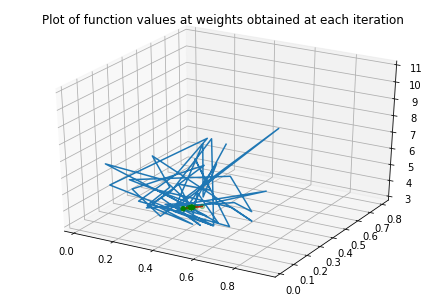

In [450]:
plt.rcParams['agg.path.chunksize'] = 10000
b =[]
d =[]
nu = []

for i in range(1,51):
    x,y = pick()
    b.append(x)
    d.append(y)
    w = np.asarray([x,y])
    nu.append(f(w))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(b, d, nu)

ax.plot(p1, p2, fv, c='r')
ax.scatter(p1, p2, fv, c='g')
plt.title('Plot of function values at weights obtained at each iteration')
plt.show()

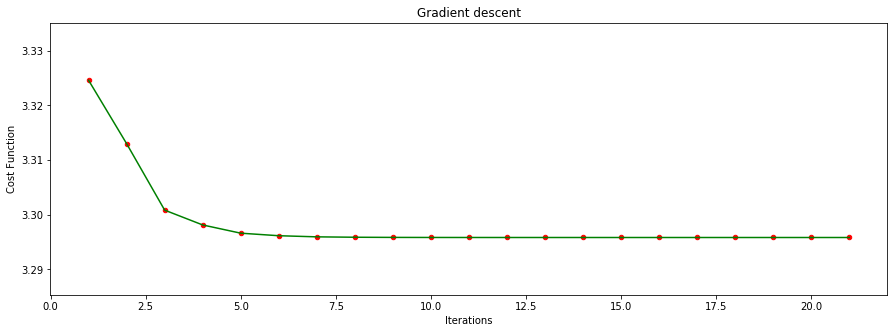

In [451]:
fig, ax = plt.subplots(figsize = (15,5))
plt.scatter(it,fv, s=20, c = 'r')
plt.plot(it,fv, c = 'g')
plt.title("Gradient descent")
plt.xlabel('Iterations')
plt.ylabel("Cost Function")
plt.show()

# Q)1)c)

In [452]:
from numpy.linalg import inv

In [453]:
# Newtons Method
def nt(w, f, lr, prec, g, prec_E):
    x = w[0]
    y = w[1]
    print("x = " + str(x))
    print("y = " + str(y))
    print("For a randomly picked initial values of w= " + str(w) + ", the value of f(w) = " + str(f(w)))
    print('\n')
    step_size = np.asarray([1,1])
    fv = []
    p = []
    p1 =[]
    p2 =[]
    p1.append(x)
    p2.append(y)
    fv.append(f(w))
    lr= 1
    i = 1
    it =[]
    it.append(i)
    s = 1
    E = 0
    while (step_size[0] > prec and step_size[1] > prec) and i < 100:
        prev = w
        prev_c= E
        h_inv = inv(h(w))
        up = np.asarray(lr*(np.dot(h_inv, g(w))))  
        w = w - up
        i += 1
        E = f(w)
        step_size = abs(prev- w)
        s = abs(prev_c - E)
        if w[0] <= 0 or w[1] <= 0 or w[0]+w[1] >=1:
            x,y = pick()
            w = np.asarray([x,y])
            i = 1
            fv = []
            p = []
            p1 =[]
            p2 =[]
            it =[]
            step_size = np.asarray([1,1])
            s = 1
            lr = lr - 0.02
            if lr <= 0:
                lr = lr+ 0.04
        it.append(i)
        p.append(w)
        p1.append(w[0])
        p2.append(w[1])
        fv.append(f(w))

    print("Optimal w = " + str(w))
    print("For the optimal value of w= " + str(w) + ", the value of f(w) = " + str(f(w)))
    return i,p1, p2, fv, it, w

In [454]:
i,p1, p2, fv, it, wopt_nt = nt(w_i,f,1, 0.00001, g, 0.01)

x = 0.3859154209875649
y = 0.026802878745336267
For a randomly picked initial values of w= [0.38591542 0.02680288], the value of f(w) = 5.103633707530626


Optimal w = [0.23941766 0.34857208]
For the optimal value of w= [0.23941766 0.34857208], the value of f(w) = 3.3701629951766705


In [455]:
print(len(it))

70


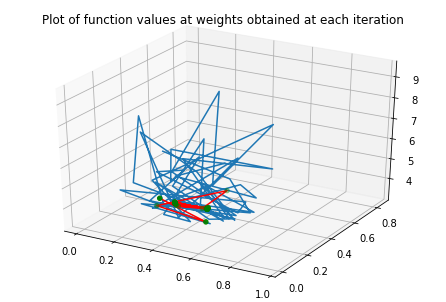

In [456]:
plt.rcParams['agg.path.chunksize'] = 10000
b =[]
d =[]
nu = []

for i in range(1,51):
    x,y = pick()
    b.append(x)
    d.append(y)
    w = np.asarray([x,y])
    nu.append(f(w))

fig = plt.figure()
ax = Axes3D(fig)
ax.plot(b, d, nu)
ax.plot(p1, p2, fv, c='r')
ax.scatter(p1, p2, fv, c='g')
plt.title('Plot of function values at weights obtained at each iteration')
plt.show()

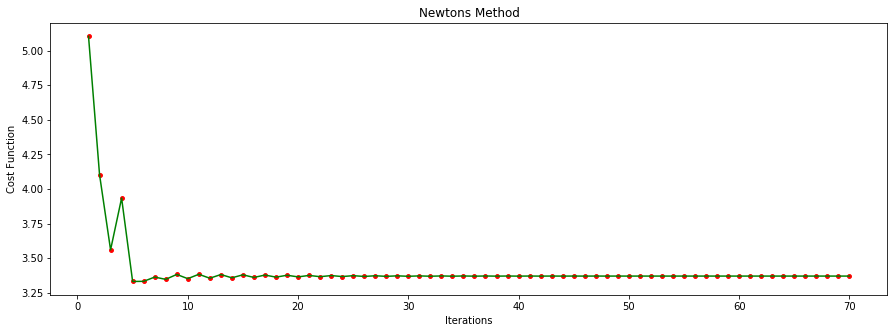

In [457]:
fig, ax = plt.subplots(figsize = (15,5))
plt.scatter(it,fv, s=15, c = 'r')
plt.plot(it,fv, c = 'g')
plt.title("Newtons Method")
plt.xlabel('Iterations')
plt.ylabel("Cost Function")
plt.show()

# Q)1) d)

# Based on my observations, the gradient descent took less number of iterations compared to Newtons method. And the minimum value of cost function obtained with gradient descent is smaller than that of Newtons method

# Q) 2) b)

In [475]:
x = []
y = []
for i in range(1,51):
    x.append([1,i])
    y.append(i+np.random.uniform(-1,1))

#print(x)
x = np.transpose(x)
y = np.transpose(y)
x = np.asarray(x)
y = np.asarray(y).reshape(1,50)
#y.shape

# Q)2)c)

In [476]:
# Linear Least Squares fit

def llsf(x,y):
    xt = np.transpose(x)
    t = inv(np.matmul(x, xt))
    xpseudo = np.matmul(xt,t)
    w = np.matmul(y,xpseudo)
    return w
    



In [477]:
#x[:,2]

In [478]:
w_opt1 = llsf(x,y)
print("The optimal value of w using Linear Least squares fit: " + str(w_opt1))

The optimal value of w using Linear Least squares fit: [[-0.19031505  1.00825282]]


# Q)2)d)

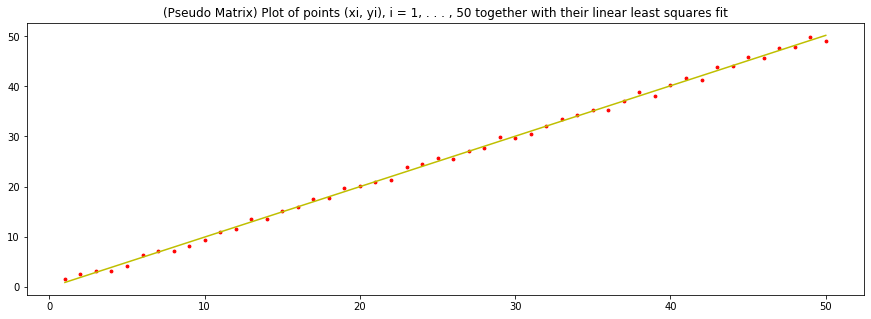

In [479]:
fig, ax = plt.subplots(figsize = (15,5))
plt.scatter(x[1,:],y, s = 8, c = 'r')
d1 = np.matmul(w_opt1, x)[0,:]
plt.plot(x[1,:],d1, c ='y')
plt.title('(Pseudo Matrix) Plot of points (xi, yi), i = 1, . . . , 50 together with their linear least squares fit')
plt.show()

# Q) 2) f)

In [480]:
w0 = np.random.uniform(low = -1, high = 1)
w1 = np.random.uniform(low = -1, high = 1)
w = [w0, w1]

In [481]:
def lms(w,x,y, prec, lr): 
    epoch = []
    error = []
    it = 1
    step_size = np.asarray([1,1])
    while (step_size[0] > prec and step_size[1] > prec) and it < 51:

        prev = w
        E = 0
        for i in range(0,50):
            d = np.dot(w, x[:,i])
            w = w + np.dot((lr*(y[0][i] - d)), x[:,i])
            E = E + np.power((y[0][i] - d),2)
        step_size = abs(np.asarray(prev)- np.asarray(w))
        error.append(E)
        epoch.append(it)
        it += 1
    print('Final error: ' + str(E))
    print('final weight: ' + str(w))
    return w, error, epoch



In [482]:
w_opt2, error, epoch = lms(w,x,y, 0.00000001, 0.0001)

Final error: 18.53220900308202
final weight: [-0.40554382  1.0102493 ]


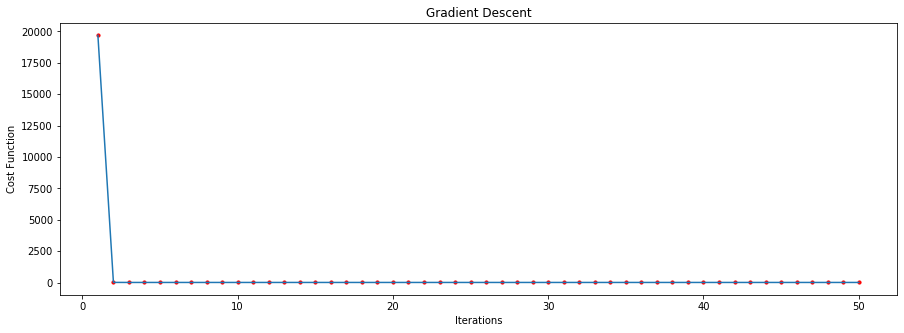

In [483]:
fig, ax = plt.subplots(figsize = (15,5))
plt.scatter(epoch,error, s=10, c = 'r')
plt.plot(epoch,error)
plt.title("Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel("Cost Function")
plt.show()

In [484]:
d2 =[]
for i in range(0,50):
    d2.append(np.matmul(w_opt2,x[:,i]))
    

Text(0.5, 1.0, '(Gradient descent) Plot of points (xi, yi), i = 1, . . . , 50 together with their linear least squares fit')

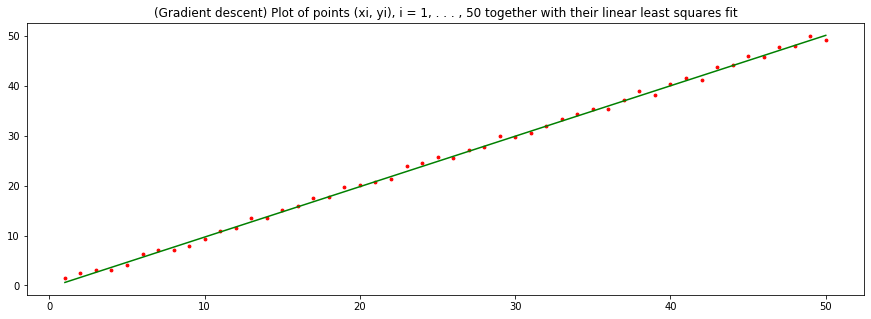

In [485]:
fig, ax = plt.subplots(figsize = (15,5))
plt.scatter(x[1,:],y, s = 8, c = 'r')
plt.plot(x[1,:],d2, c = 'g')
plt.title('(Gradient descent) Plot of points (xi, yi), i = 1, . . . , 50 together with their linear least squares fit')

# Comparision between fits obtained using pseudo matix and gradient descent

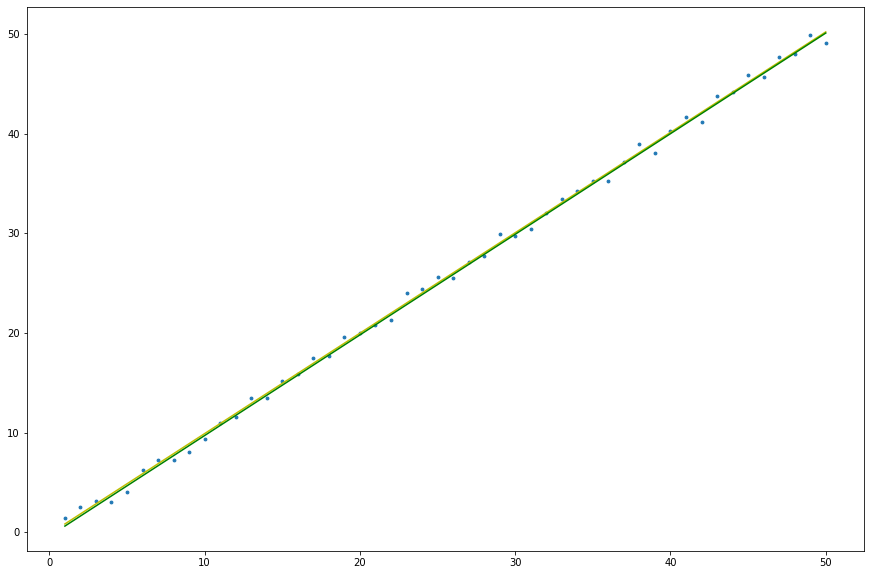

In [486]:
fig, ax = plt.subplots(figsize = (15,10))
plt.scatter(x[1,:],y, s = 8)
plt.yscale('linear')
# Pseudo Matrix plot
# Yellow line
plt.plot(x[1,:],d1, c ='y')

# Gradient plot
# Green Line
plt.plot(x[1,:],d2, c = 'g')

# The plots of fits obtained from pseudo inverse and gradient descent are almost similar (Yellow plot is of Pseudo Matrix and Green is of Gradient Descent.